In [2]:
%load_ext autoreload
%autoreload 2
def loadDfs():
  dfs_to_load = [
    # Earlier aggregates doesn't have bias columns.
    "~/OneDrive/Aggregates/AllAnimals__2022_01_16.pkl",
  ]
  import pandas as pd
  dfs = []
  for fp in dfs_to_load:
        dfs.append(pd.read_pickle(fp))
  return pd.concat(dfs)

def setup():
  import os
  from pathlib import Path
  cur_dir = Path(os.getcwd())
  if cur_dir.name == "report":
    os.chdir(cur_dir.parent)
    print("Changing directories")
  from report import analysis
  analysis.setMatplotlibParams(silent=True)
setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
raw_df = loadDfs()

In [15]:
from IPython.display import Image, Markdown
display(Markdown("# Sedef Comments"))
Image(url="assets/Sedef_directions.jpg", width=800,)

# Sedef Comments

C:\Users\hatem\.conda\envs\analysis\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


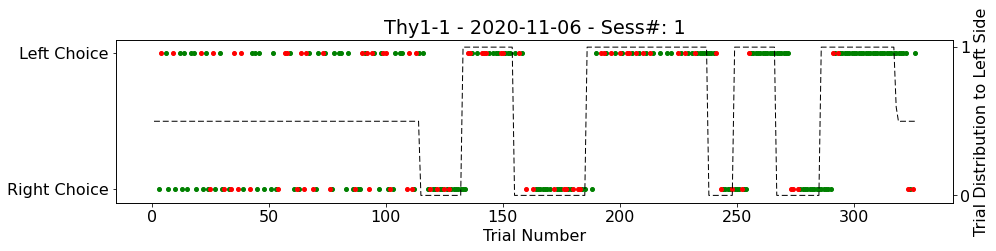

Sess info: ('Thy1-1', datetime.date(2020, 11, 6), 1)


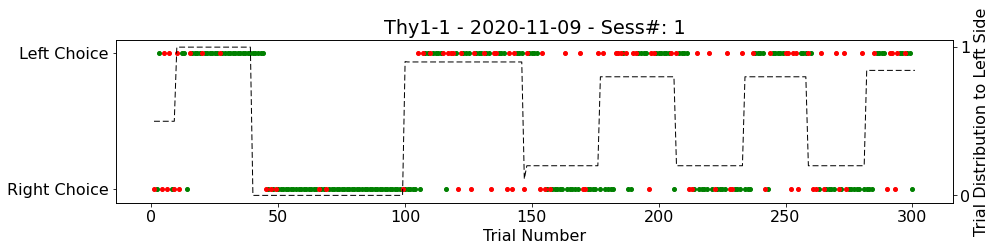

Sess info: ('Thy1-1', datetime.date(2020, 11, 9), 1)


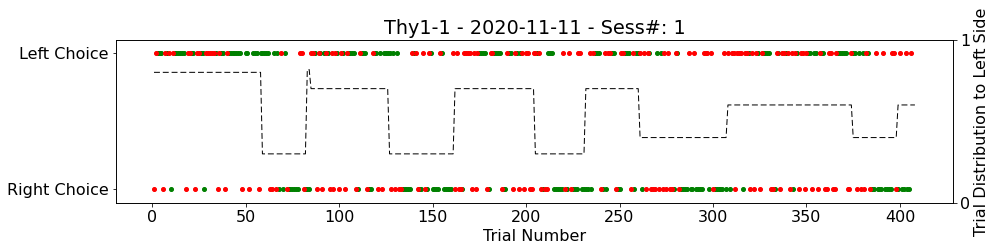

Sess info: ('Thy1-1', datetime.date(2020, 11, 11), 1)


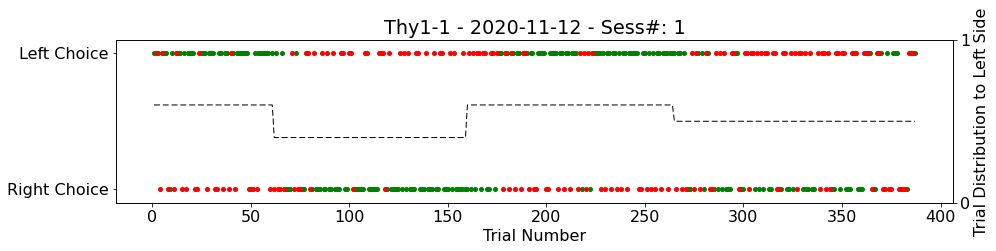

Sess info: ('Thy1-1', datetime.date(2020, 11, 12), 1)


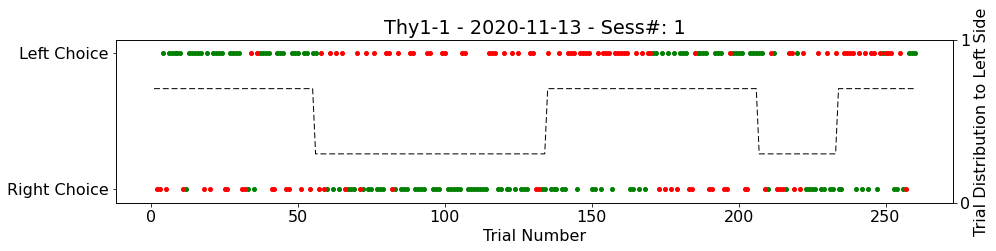

Sess info: ('Thy1-1', datetime.date(2020, 11, 13), 1)


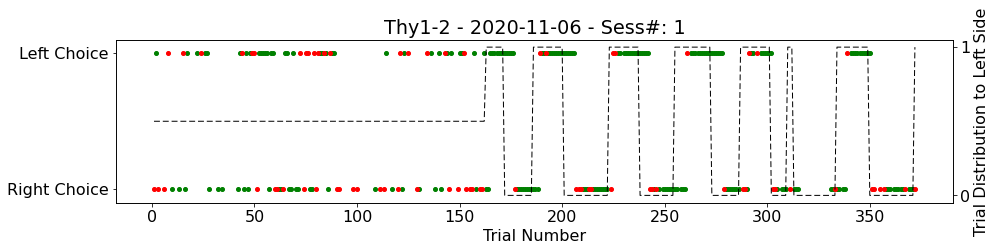

Sess info: ('Thy1-2', datetime.date(2020, 11, 6), 1)


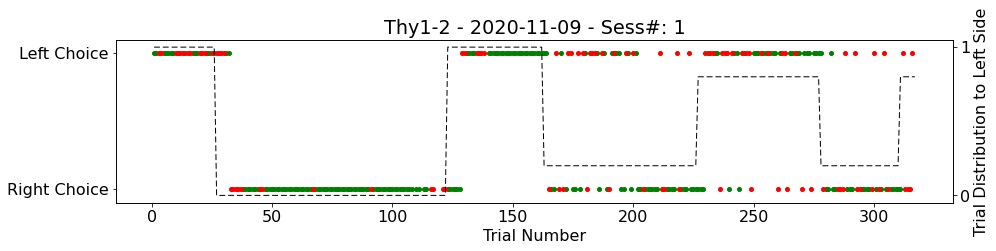

Sess info: ('Thy1-2', datetime.date(2020, 11, 9), 1)


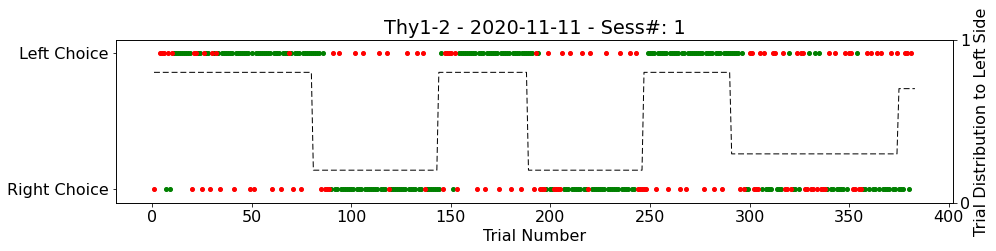

Sess info: ('Thy1-2', datetime.date(2020, 11, 11), 1)


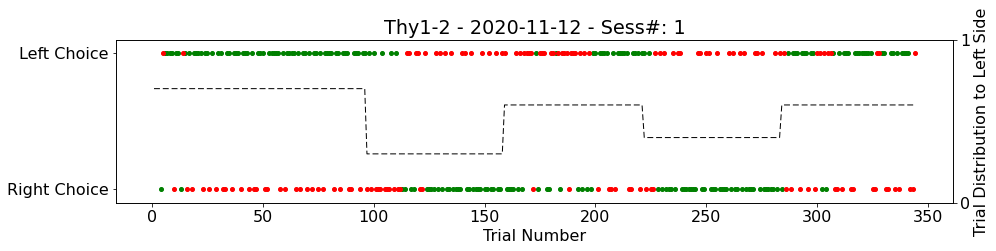

Sess info: ('Thy1-2', datetime.date(2020, 11, 12), 1)


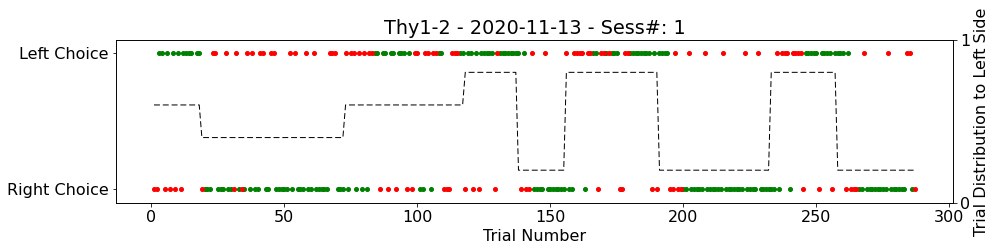

Sess info: ('Thy1-2', datetime.date(2020, 11, 13), 1)


In [12]:
def load(df):
  import matplotlib.pyplot as plt
  from datetime import date
  df = df[df.Name.isin(["Thy1-1", "Thy1-2"])]
  df = df[(df.Date >= date(2020, 10, 29)) & (df.Date <= date(2020, 11, 20))]
  # df = df[df.GUI_CorrectBias == 0]
  import numpy as np
  df.GUI_LeftBiasVal = df.GUI_LeftBiasVal.astype(np.float)
  from report.utils import grpBySess
  for sess_info, sess_df in grpBySess(df):
    unique_bias_vals = sess_df.GUI_LeftBiasVal.unique()
    if len(unique_bias_vals) == 1 and unique_bias_vals[0] == 0.5:
      continue
    plt.gcf().set_size_inches(15, 3)
    ax = plt.axes()
    ax.set_title(f"{sess_info[0]} - {sess_info[1].strftime('%Y-%m-%d')} - Sess#: {sess_info[2]}")
    twix = ax.twinx()
    twix.plot(sess_df.TrialNumber, 1- sess_df.GUI_LeftBiasVal, linestyle="--", c='k',
              linewidth=1)
    twix.set_yticks([0, 1.0])
    twix.set_ylabel("Trial Distribution to Left Side")
    corr = sess_df[sess_df.ChoiceCorrect == True]
    incorr = sess_df[sess_df.ChoiceCorrect == False]
    
    for df_set, set_clr in [(corr, 'g'), (incorr,'r')]:
      ax.plot(df_set.TrialNumber, df_set.LeftRewarded, linestyle='None', 
              marker='o', markerfacecolor=set_clr, markeredgecolor=set_clr,
             markersize=4)
    ax.set_xlabel("Trial Number")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Right Choice", "Left Choice"])
    ax.set_ylim(-0.1, 1.1)
    plt.show()
    print("Sess info:", sess_info)
res = load(raw_df)

In [12]:
def load(df):
  import matplotlib.pyplot as plt
  import numpy as np
  from datetime import date
  df = df[df.Date == date(2020, 11, 9)]
  df.GUI_LeftBiasVal = df.GUI_LeftBiasVal.astype(np.float)
  from report.utils import grpBySess
  for sess_info, sess_df in grpBySess(df):
    sess_df = sess_df[sess_df.FixBroke == 1]
    broke_fix = len(sess_df)
    print("Sess info:", sess_info, "Broke fix:", broke_fix)
res = load(raw_df)

Sess info: ('IO2', datetime.date(2020, 11, 9), 1) Broke fix: 2
Sess info: ('IO7', datetime.date(2020, 11, 9), 1) Broke fix: 0
Sess info: ('OM1', datetime.date(2020, 11, 9), 2) Broke fix: 0
Sess info: ('OM2', datetime.date(2020, 11, 9), 1) Broke fix: 0
Sess info: ('TT1', datetime.date(2020, 11, 9), 1) Broke fix: 0
Sess info: ('TT2', datetime.date(2020, 11, 9), 1) Broke fix: 0
Sess info: ('TT3', datetime.date(2020, 11, 9), 1) Broke fix: 1
Sess info: ('Thy1-1', datetime.date(2020, 11, 9), 1) Broke fix: 0
Sess info: ('Thy1-2', datetime.date(2020, 11, 9), 1) Broke fix: 1
Sess info: ('VM2', datetime.date(2020, 11, 9), 1) Broke fix: 2
Sess info: ('vgat2.1', datetime.date(2020, 11, 9), 1) Broke fix: 8
Sess info: ('vgat2.4', datetime.date(2020, 11, 9), 1) Broke fix: 0
Sess info: ('vgat2.5', datetime.date(2020, 11, 9), 1) Broke fix: 18
Sess info: ('vgat2.6', datetime.date(2020, 11, 9), 1) Broke fix: 1


C:\Users\hatem\.conda\envs\analysis\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
print(f"0b{7:05b}")
print(f"0b{16:05b}")

0b00111
0b10000
